In [1]:
import os

os.environ['API_KEY'] = "8ofL9LVF9Xv3q3yFVSXGzG9j0"
os.environ['API_KEY_SECRET'] = "wvq1MmPQXfq1FD31RJSsKQVsYhKbpJySpcvdSZ4pLfa20X2BZH"
os.environ['BEARER_TOKEN'] = "AAAAAAAAAAAAAAAAAAAAAF0hZgEAAAAAzu5SizJqQ8MlDcQMDC81XZUYtQ8%3DPpx5kBzGN0XAnoRuC4vHRnB6Fy55zgZj2iR2FAyoyKaDdn3dSN"

In [2]:
import requests
import os
import json
import APISecret #Remove this line to test

#print("hello")

#print(os.environ.get("API_KEY"))


def urlGen(search, maxTweets = 10):
    search = search + " lang:en"
    url = "https://api.twitter.com/2/tweets/search/recent"

    query_params = {'query': search,
                    'max_results': maxTweets,
                    'next_token': {},
                    'tweet.fields': 'public_metrics'}
    return url, query_params


def v2auth():
    #REPLACE THIS LINE WITH BEARER TOKEN TO TEST
    #ALSO REMOVE THE LINE "import APISecret"
    return os.environ.get("BEARER_TOKEN")

def requestHeaders(token):
    headers = {"Authorization": "Bearer {}".format(token)}
    return headers

def accessEndpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token
    response = requests.request("GET", url, headers=headers, params=params)
    #print(os.environ.get("BEARER_TOKEN"))
    print("Response: " + str(response.status_code))

    return response.json()

def callTwitter(search, max_results=20):
    bearer_token = v2auth()
    headers = requestHeaders(bearer_token)
    #search = "Kanye Pete"
    #max_results = 20
    url = urlGen(search, max_results)
    json_response = accessEndpoint(url[0], headers, url[1])
    return json_response


#jsonresponse = callTwitter("Kanye Pete Davidson beef", 40)
#HistDict = {}
#for item in jsonresponse["data"]:
#    if 'RT @' not in item["text"]:
#        try:
#            HistDict[item["text"][0:12]]
#        except:
#            HistDict[item["text"][0:12]] = 1
#            print(item["text"])
        
#print("done")
#print(jsonresponse)
#print(HistDict["hey"])


In [3]:
import nltk
from nltk.corpus import stopwords
import numpy as np
import copy


class tweetCleaner():
    def __init__(self, jsonObj):
        self.json = jsonObj
        self.cleanedJson = copy.copy(jsonObj)

    def lowerTweets(self):
        for item in self.cleanedJson['data']:
            item['text'] = item['text'].lower()

    def removeLinks(self):
        for item in self.cleanedJson['data']:
            tweetText = item['text']
            textArr = tweetText.split(' ')
            for word in textArr:
                if 'http' in word:
                    textArr.remove(word)
            newText = ' '.join(textArr)
            item['text'] = newText

    def removeRepeats(self):
        repeatArray = np.array([])
        myCopy = copy.copy(self.cleanedJson['data'])
        for item in myCopy:
            if ('rt @' in item['text']):
                self.cleanedJson["data"].remove(item)
            elif item['text'] in repeatArray:
                self.cleanedJson["data"].remove(item)
            else:
                repeatArray = np.append(repeatArray, item["text"])

    def removeStopWords(self):
        nltk.download('stopwords')
        stopWords = stopwords.words('english')
        for item in self.cleanedJson["data"]:
            tweetText = item['text']
            textArr = tweetText.split(' ')
            for word in textArr:
                if word in stopWords:
                    textArr.remove(word)
            newText = ' '.join(textArr)
            item['text'] = newText

    def prepTweets(self):
        self.lowerTweets()
        self.removeLinks()
        self.removeRepeats()
        self.removeStopWords()



json = callTwitter("Kanye Pete Davidson beef", 100)
g = tweetCleaner(json)

g.prepTweets()
for item in g.cleanedJson['data']:
    print(item['text'])


print("done")

Response: 200
tired seeing kanye my news feeds this pete davidson beef shit hilarious 😂 ...lets a moment pray kanye 🙏
alright kanye, let's take break think we speak... #stopkanye2022
are real people there spending time searching “pete davidson kanye beef update”
#charlamagne tha god claims there's 'big' reason #kanye #smallhands west beef #petedavidson #newsbreak #ye lost #big
news page stop tweeting the beef kanye, kim k, pete davidson, peppa pig idk do gaf
all media outlets, think can speak behalf the entire worlds population i say this; nobody cares kanye pete davidson’s twitter beef. 

thank
sincerely cannot think something care less than pete davidson/kanye beef. could take to stamp museum it would seem like amusement park comparison
#kanyewest shows love #michaelche amid #petedavidson beef
i an opinion the kanye/pete davidson beef? bc i've got own problems deal with. like example few months ago jam spilled the fridge i never cleaned up sometimes hair gets stuck to it.
.@jakepaul 

C:\Users\brand\AppData\Local\Temp/ipykernel_3172/1849496929.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif item['text'] in repeatArray:
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd

textList = []
likeCounts = []

for item in g.cleanedJson['data']:
    #print(item['text'])
    textList.append(item['text'])
    likeCounts.append(item['public_metrics']['like_count'])

data = {'text': textList, 'likeCounts': likeCounts}

df = pd.DataFrame(data)
df

,text,likeCounts
0,tired seeing kanye my news feeds this pete dav...,0
1,"alright kanye, let's take break think we speak...",0
2,are real people there spending time searching ...,1
3,#charlamagne tha god claims there's 'big' reas...,0
4,"news page stop tweeting the beef kanye, kim k,...",13
5,"all media outlets, think can speak behalf the ...",95
6,sincerely cannot think something care less tha...,5
7,#kanyewest shows love #michaelche amid #peteda...,2
8,i an opinion the kanye/pete davidson beef? bc ...,15
9,.@jakepaul putting money line squash the beef ...,3


In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')

tweets = df['text']

sid = SentimentIntensityAnalyzer()

scores = []

for tweet in tweets:
    score=sid.polarity_scores(tweet)
    scores.append(score['compound'])
    print(tweet,score, '\n')
    


tired seeing kanye my news feeds this pete davidson beef shit hilarious 😂 ...lets a moment pray kanye 🙏 {'neg': 0.277, 'neu': 0.511, 'pos': 0.213, 'compound': -0.3612} 

alright kanye, let's take break think we speak... #stopkanye2022 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.25} 

are real people there spending time searching “pete davidson kanye beef update” {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

#charlamagne tha god claims there's 'big' reason #kanye #smallhands west beef #petedavidson #newsbreak #ye lost #big {'neg': 0.125, 'neu': 0.761, 'pos': 0.114, 'compound': -0.0516} 

news page stop tweeting the beef kanye, kim k, pete davidson, peppa pig idk do gaf {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.3818} 

all media outlets, think can speak behalf the entire worlds population i say this; nobody cares kanye pete davidson’s twitter beef. 

thank {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.6705} 

sincerely cannot think something care l

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
df['sentiment_score'] = scores
df

,text,likeCounts,sentiment_score
0,tired seeing kanye my news feeds this pete dav...,0,-0.3612
1,"alright kanye, let's take break think we speak...",0,0.2500
2,are real people there spending time searching ...,1,0.0000
3,#charlamagne tha god claims there's 'big' reas...,0,-0.0516
4,"news page stop tweeting the beef kanye, kim k,...",13,-0.3818
5,"all media outlets, think can speak behalf the ...",95,0.6705
6,sincerely cannot think something care less tha...,5,0.6675
7,#kanyewest shows love #michaelche amid #peteda...,2,0.6369
8,i an opinion the kanye/pete davidson beef? bc ...,15,-0.2960
9,.@jakepaul putting money line squash the beef ...,3,0.0000


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

vec = CountVectorizer(stop_words = 'english')

counts = vec.fit_transform(df['text'])

count_df=pd.DataFrame(counts.toarray(), columns = vec.get_feature_names())
df= pd.concat((df, count_df), axis = 1)
df


,text,likeCounts,sentiment_score,0ab26tvauo,30,30m,60,ago,alright,amid,...,ve,vs,way,west,willing,win,winning,worlds,ye,youtuber
0,tired seeing kanye my news feeds this pete dav...,0,-0.3612,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"alright kanye, let's take break think we speak...",0,0.2500,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,are real people there spending time searching ...,1,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,#charlamagne tha god claims there's 'big' reas...,0,-0.0516,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,"news page stop tweeting the beef kanye, kim k,...",13,-0.3818,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"all media outlets, think can speak behalf the ...",95,0.6705,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,sincerely cannot think something care less tha...,5,0.6675,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,#kanyewest shows love #michaelche amid #peteda...,2,0.6369,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,i an opinion the kanye/pete davidson beef? bc ...,15,-0.2960,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,.@jakepaul putting money line squash the beef ...,3,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


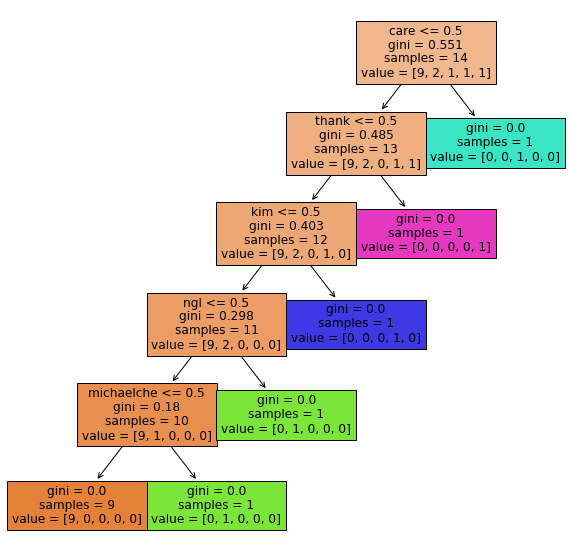

0.75


In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


X = df.drop(['likeCounts', 'text'], axis=1)
y = df['likeCounts']

def fit_tree(X, y, d):
    T = tree.DecisionTreeClassifier(max_depth=d)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
    T.fit(X_train, y_train)
    return T

T = fit_tree(X, y, 20)

fig, ax = plt.subplots(1, figsize = (10, 10))
p = tree.plot_tree (T, filled = True, feature_names = X.columns)
plt.show()

T = fit_tree(X, y, d=20)
print(T.score(X,y))

C:\Users\brand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\brand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\brand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\brand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\brand\anaconda3\lib\site-packages\s

Training score is: 1.0
Test score is: 0.16666666666666666


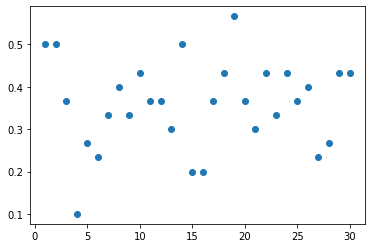

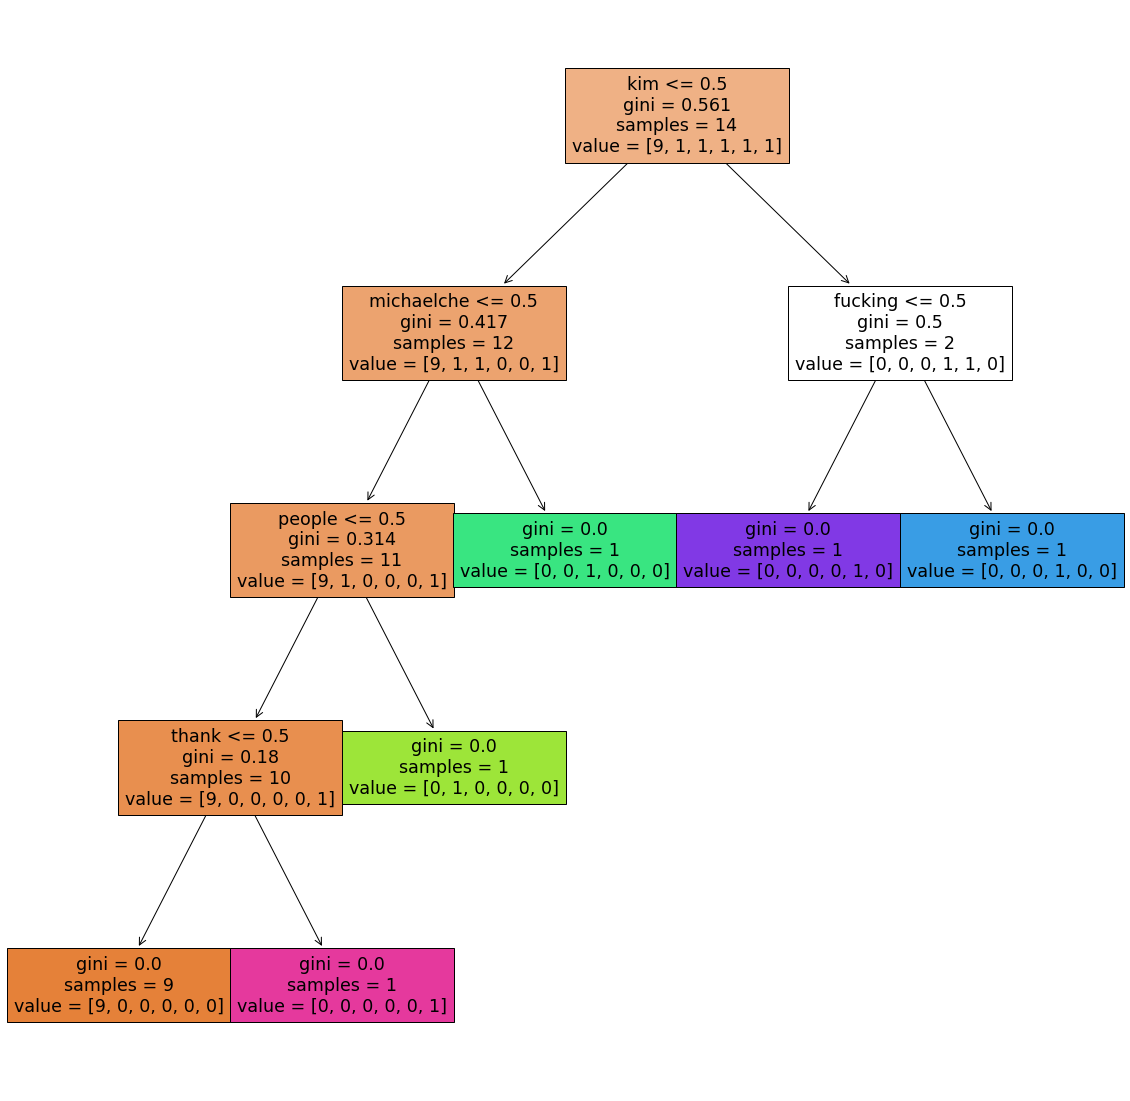

In [18]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

def best_fit(X, y):

    #initialize the best score as negative infinity
    best_score = -np.inf
    #create an array to store the score of each depth
    scores = np.zeros(30)

    #testing each depth from 1 to 30 for our Decision Tree
    for d in range(1,31):
        #create a tree with the current depth
        T = tree.DecisionTreeClassifier(max_depth=d)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
        
        #use cross validation with 5 folds to get the average score for that depth
        scores[d-1]=cross_val_score(T,X_train,y_train,cv=5).mean()
        
        #if the current depth scores the best so far, update best depth and best score
        if scores[d-1]>best_score:
            best_score=scores[d-1]
            best_depth=d
        
    plt.scatter(np.arange(1,31),scores)
    best_depth, best_score
    
    # Lastly, train a decision tree classification model T using the best max depth. 
    # Score the model against the test data. Print the score and observe the output.

    T = tree.DecisionTreeClassifier(max_depth=5)
    T.fit(X_train,y_train)

    print("Training score is: " + str(T.score(X_train, y_train)))
    print("Test score is: " + str(T.score(X_test, y_test)))
    
    fig, ax = plt.subplots(1, figsize = (20, 20))
    p = tree.plot_tree(T, filled = True, feature_names = X.columns)
    
best_fit(X, y)

NameError: name 'X_train' is not defined